# Free Response of a Single Degree of Freedom System

In [1]:
# The following two lines will cause vtoolbox.py to be reloaded automatically if edited
# This is helpful in development
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
import vtoolbox as vtb

In [4]:
help(vtb.sdof_free_response)

Help on function sdof_free_response in module vtoolbox:

sdof_free_response(m=10, c=1, k=100, x0=1, v0=-1, max_time=10)
    returns t, x, v, zeta, omega, omega_d, A
    $lpha$
    Returns free response of a second order linear ordinary differential equation
    defined by
    :math:`m\ddot{x} + c \dot{x} + k x = 0`
    given initial conditions :math:`x_0` and :math:`\dot{x}_0 = v_0` for
    :math:`0 < t < t_{max}`
    
    Parameters
    
    m, c, k:           1) Floats. Mass, damping and stiffness.
    x0, v0:            2) Floats. Initial conditions
    max_time:          3) Float. end time or response to be returned
    
    Returns
    
    t, x, v: 1) Arrays. Time, displacement, and velocity
    
    :Example:
    >>> import vtoolbox as vtb
    >>> vtb.sdof_free_response()
    (array([  0.00000000e+00,   4.00160064e-03,   8.00320128e-03, ...,
             9.99199680e+00,   9.99599840e+00,   1.00000000e+01]), array([[ 1.        ],
           [ 0.99591926],
           [ 0.9916807 

In this Notebook we investigate the impact of various parameters on the response of a single mass-damper-spring system. 

$$
m\ddot{x} +c\dot{x}+kx=0
$$

Here m, c, and k are the mass, damping, and stiffness in consistent units. 

## Computing the trajectories and plotting the result

Let's call the function once to view the solutions. For this set of parameters, we see the trajectories swirling around two points, called attractors. 

In [5]:
vtb.sdof_free_response(max_time = 30)

(array([  0.00000000e+00,   4.00053340e-03,   8.00106681e-03, ...,
          2.99919989e+01,   2.99959995e+01,   3.00000000e+01]),
 array([[ 1.        ],
        [ 0.99592037],
        [ 0.99168301],
        ..., 
        [ 0.14935453],
        [ 0.14704982],
        [ 0.1447225 ]]),
 array([[-1.        ],
        [-1.03951626],
        [-1.07885042],
        ..., 
        [-0.57324346],
        [-0.57894194],
        [-0.58454551]]),
 0.015811388300841896,
 3.1622776601683795,
 3.1618823507524758,
 1.0441611791969838)

Using IPython's `interactive` function, we can explore how the trajectories behave as we change the various parameters.

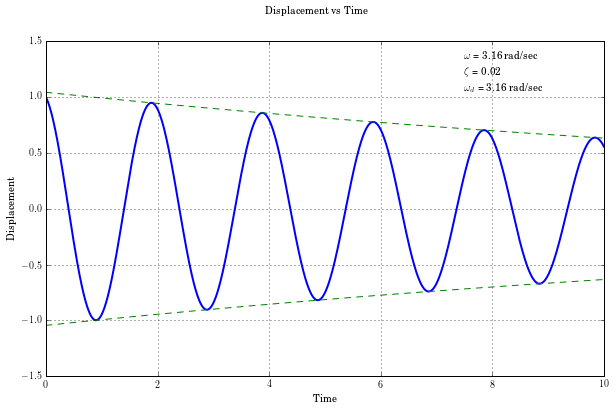

In [6]:
vtb.sdof_time_plot(m=10, c=1, k=100, x0=1, v0=-1, max_time=10)

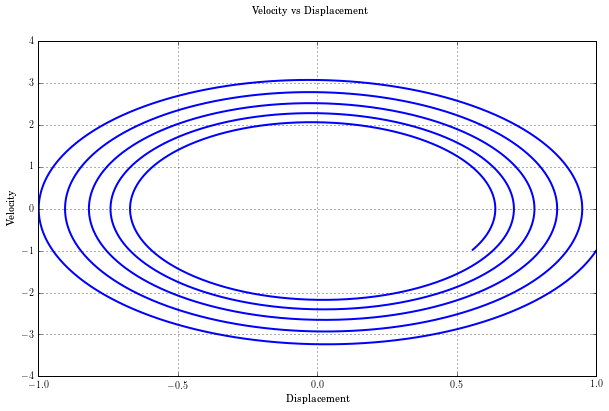

In [7]:
vtb.sdof_phase_plot(m=10, c=1, k=100, x0=1, v0=-1, max_time=10)

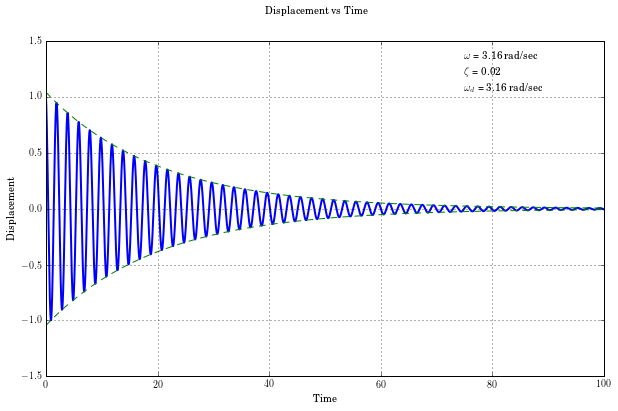

In [8]:
vtb.sdof_time_plot_i()

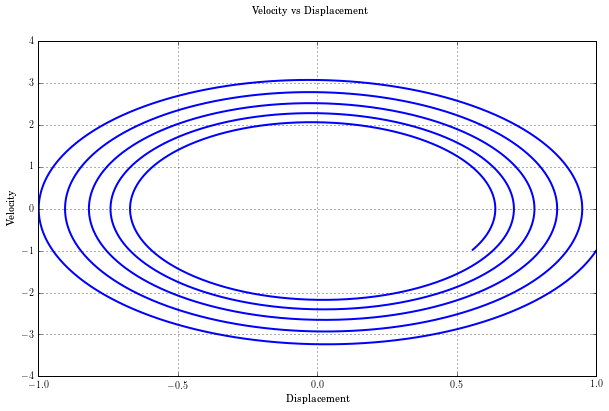

In [9]:
vtb.sdof_phase_plot_i()

After interacting with the system, we can take the result and perform further computations. In this case, we compute the average positions in $x$, $y$ and $z$.

Creating histograms of the average positions (across different trajectories) show that on average the trajectories swirl about the attractors.

In [ ]:
def vtb2_5(m=1,m0=.1,e=0.01,z=0.1,rmin=0.2,rmax=2):
    r=sp.arange(rmin,rmax,(rmax - rmin) / 1000)
    Xn=((r ** 4) / ((1 - r ** 2) ** 2 + (2 * z * r) ** 2))**0.5
    X=Xn * m0 * e / m
    phi=sp.arctan2(2 * z * r,1 - r ** 2)
    fig = plt.figure()
    fig.subplots_adjust(wspace = .4)
    plt.subplot(1,2,1)
    plt.plot(r,Xn,'-')
    plt.grid('on')
    plt.xlabel('Frequency Ratio')
    plt.ylabel('Normalized Displacement Magnitude')
    plt.title('Normalized Displacement Magnitude')

    plt.subplot(1,2,2)
    plt.plot(r,phi,'-')
    plt.grid('on')
    plt.xlabel('Frequency Ratio')
    plt.ylabel('Phase')
    plt.title('Phase')

    return

In [ ]:
vtb2_5()


In [ ]:
help(plt.subplot)

In [ ]:
plt.hist(xyz_avg[:,1])
plt.title('Average $y(t)$')

In [1]:
x = 1

In [4]:
eval('x')

1

In [7]:
from scipy import integrate

In [9]:
help(integrate.odeint)

Help on function odeint in module scipy.integrate.odepack:

odeint(func, y0, t, args=(), Dfun=None, col_deriv=0, full_output=0, ml=None, mu=None, rtol=None, atol=None, tcrit=None, h0=0.0, hmax=0.0, hmin=0.0, ixpr=0, mxstep=0, mxhnil=0, mxordn=12, mxords=5, printmessg=0)
    Integrate a system of ordinary differential equations.
    
    Solve a system of ordinary differential equations using lsoda from the
    FORTRAN library odepack.
    
    Solves the initial value problem for stiff or non-stiff systems
    of first order ode-s::
    
        dy/dt = func(y, t0, ...)
    
    where y can be a vector.
    
    *Note*: The first two arguments of ``func(y, t0, ...)`` are in the
    opposite order of the arguments in the system definition function used
    by the `scipy.integrate.ode` class.
    
    Parameters
    ----------
    func : callable(y, t0, ...)
        Computes the derivative of y at t0.
    y0 : array
        Initial condition on y (can be a vector).
    t : array
        